# 06 Interpreting two-way tables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
import findspark; findspark.init()
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
spark = SparkSession.builder.appName('statistics').master('local').getOrCreate()

[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/stats-two-way-tables/v/interpreting-two-way-tables?modal=1)

![Interpreting two-way tables fig 1](./imgs/01-06-01.png)

In [3]:
dataset = {
    'Candidate': ['Obama', 'Romney', 'Other'],
    'Men': [0.42, 0.52, 0.06],
    'Women': [0.52, 0.43, 0.05]
    }

In [6]:
df = pd.DataFrame(dataset).set_index('Candidate')
df = df.append(df.sum().rename('Total'))
df

Men  Women
Candidate             
Obama      0.42   0.52
Romney     0.52   0.43
Other      0.06   0.05
Total      1.00   1.00

In [9]:
sdf = spark.createDataFrame(zip(*dataset.values()), schema=list(dataset.keys()))
sdf.registerTempTable('sdf_table')
sdf.show()

+---------+----+-----+
|Candidate| Men|Women|
+---------+----+-----+
|    Obama|0.42| 0.52|
|   Romney|0.52| 0.43|
|    Other|0.06| 0.05|
+---------+----+-----+



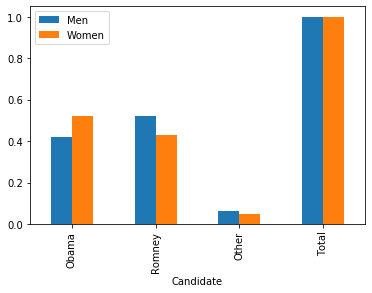

In [10]:
df.plot(kind='bar')

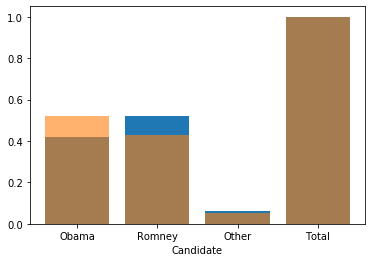

In [21]:
plt.bar(df.index, df['Men'])
plt.bar(df.index, df['Women'], alpha=0.6)
plt.xlabel('Candidate')
plt.show()

In [22]:
melt_df = df.reset_index().melt(id_vars='Candidate', var_name='Gender', value_name='Percentage')
melt_df

Candidate Gender  Percentage
0     Obama    Men        0.42
1    Romney    Men        0.52
2     Other    Men        0.06
3     Total    Men        1.00
4     Obama  Women        0.52
5    Romney  Women        0.43
6     Other  Women        0.05
7     Total  Women        1.00

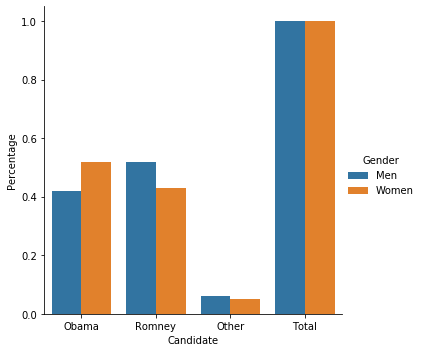

In [27]:
sns.catplot(x='Candidate', y='Percentage', hue='Gender', data=melt_df, kind='bar')
plt.show()

In [33]:
data = [go.Bar(x=df.index, y=df['Men'], marker_color='cornflowerblue', name='Men'),
        go.Bar(x=df.index, y=df['Women'], marker_color='orange', name='Women')]
fig = go.Figure(data=data)
fig.update_layout(
    xaxis_title='Candidate',
    yaxis_title='Percentage'
)
fig.show()